In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
custom_ngram_df = pd.read_pickle('../Data/01_clean_sf_custom_ngram')

In [3]:
custom_ngram_df.head()

,company_name,job_title,listed_items,url
0,Gap Inc. Corporate,"Software Engineer, Price Execution",write build product according business need co...,https://www.indeed.com/rc/clk?jk=77d524a7cf198...
1,WrkShp,Business Analyst,closely product assist investigation deep dive...,https://www.indeed.com/company/WrkShp/jobs/Bus...
2,Ceres Imaging,Image Processing: GIS / Remote Sensing Analyst,proficiency gi software e g arcgis envi experi...,https://www.indeed.com/rc/clk?jk=8f702cd563785...
3,Deloitte,"Analyst, Strategy and Research",effectively interpret client request use tacti...,https://www.indeed.com/rc/clk?jk=8a288a5c5a09d...
4,Turing Video,Computer Vision Software Engineer,maintain existing software system implement co...,https://www.indeed.com/rc/clk?jk=fcf308f2fee2a...


### TF-IDF - KMeans

In [4]:
tf_idf = TfidfVectorizer(max_df=0.95)
tf_idf_array = tf_idf.fit_transform(custom_ngram_df.listed_items).toarray()
tf_idf_df = pd.DataFrame(tf_idf_array,columns=tf_idf.get_feature_names())
tf_idf_df.shape

(3416, 15951)

In [5]:
tf_idf_df.values.transpose()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
tf_idf_df.head()

,00,000,000ad_hoc,000best_practice,000machine_learning,000skill_experience,007ability_independently,007end_end,00am,00pm,...,zookeeperend_end,zoom,zoura,zuckerberg,zurb,zvs,zweigwhite,zymergen,zymo,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
inertia = []
i = 2
while i <= 26:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,n_init=5)
    km.fit(tf_idf_df.values)
    inertia.append(km.inertia_)
    i += 1

In [8]:
inertia

[3168.7603993577995,
 3145.0668368640063,
 3126.7232196840846,
 3114.6528180896903,
 3101.4054240507357,
 3091.805993287593,
 3086.1213163388243,
 3073.1044160998863,
 3062.3057918283625,
 3058.3184286330684,
 3052.8643032861155,
 3045.184760409139,
 3037.7297391858933,
 3030.687977130044,
 3029.2150860526162,
 3018.9194992352277,
 3019.2319707151064,
 3013.7098239932334,
 3005.8758711349274,
 3000.724731685207,
 2992.783669449434,
 2989.359626992252,
 2986.6530376552264,
 2983.2557109910185,
 2979.512678168578]

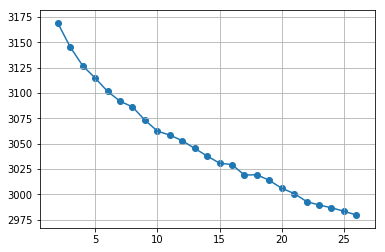

In [9]:
plt.grid()
plt.plot(range(2,27,1),inertia)
plt.scatter(range(2,27,1),inertia)

### Word2vec

In [10]:
word2vec_df = pd.read_pickle('../Data/01_sf_data_word2vec')

In [11]:
inertia = []
i = 2
while i <= 25:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,verbose=1,n_init=5)
    km.fit(word2vec_df.values)
    inertia.append(km.inertia_)
    i += 1

Initialization complete
Initialization complete
start iteration
start iteration
Initialization complete
done sorting
done sorting
start iteration
end inner loop
end inner loop
Initialization complete
done sorting
start iteration
end inner loop
Iteration 0, inertia 538.1291680725307
Iteration 0, inertia 526.9783977620239
start iteration
done sorting
Iteration 0, inertia 546.0512780036233
start iteration
end inner loop
done sorting
start iteration
done sorting
Initialization complete
end inner loop
done sorting
Iteration 0, inertia 531.1410622504189
start iteration
end inner loop
end inner loop
start iteration
done sorting
Iteration 1, inertia 526.7468008298317
end inner loop
done sorting
Iteration 1, inertia 524.2752569138457
Iteration 1, inertia 529.8977868024967
start iteration
start iteration
start iteration
done sorting
done sorting
end inner loop
done sorting
end inner loop
Iteration 0, inertia 533.9159940677555
end inner loop
end inner loop
Iteration 1, inertia 522.1889577033253
s

In [14]:
inertia

[517.140595173788,
 476.65125309911315,
 450.63460805824275,
 435.5751658166718,
 423.1326224113944,
 413.7684796894405,
 407.13694594235176,
 401.7033336550823,
 395.5727328156899,
 391.916344238077,
 388.6802804525488,
 383.70456247331305,
 379.5240194467136,
 375.86571838437567,
 374.106662926346,
 369.85658531192877,
 367.6233884741108,
 365.3880262650437,
 362.2258629455968,
 360.7166883904991,
 358.1624739972109,
 357.7199229543317,
 355.60594724555415,
 352.25758936016064]

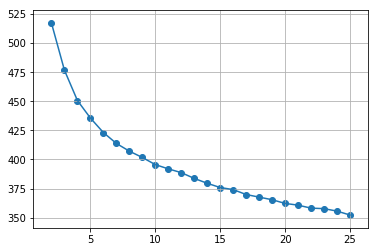

In [15]:
plt.grid()
plt.plot(range(2,26,1),inertia)
plt.scatter(range(2,26,1),inertia)

## Assigning Classes

In [10]:
km = KMeans(n_clusters=10,n_jobs=-1,n_init=10)
km.fit(tf_idf_df.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
labels_df = pd.DataFrame(km.labels_, columns=['labels'])

In [15]:
labels_df.shape

(3416, 1)

In [16]:
df = pd.read_pickle('../Data/01_clean_sf')

In [17]:
df.shape

(3416, 4)

In [20]:
df = df.merge(labels_df,left_index=True,right_index=True)

## Adding SVD

In [23]:
pca = PCA(n_components=3)
pca.fit(tf_idf_df)
tf_idf_df = pd.DataFrame(pca.transform(tf_idf_df))

In [24]:
df = df.merge(tf_idf_df,left_index=True,right_index=True)

In [26]:
df.to_pickle('../Data/01_sf_labeled')